# Linear Regression Model

## Terms
  * Model: an equation between one variable -the response- that you're trying to estimate and other variables that you can use to come up with estimation - called predictors

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

housing = pd.read_csv('./data/housing.csv', sep=r'\s*,\s*', encoding='ascii', engine = 'python')
housing.head()

,Unnamed: 0,LSTAT,INDUS,NOX,RM,MEDV
0,0,4.98,2.31,0.538,6.575,24.0
1,1,9.14,7.07,0.469,6.421,21.6
2,2,4.03,7.07,0.469,7.185,34.7
3,3,2.94,2.18,0.458,6.998,33.4
4,4,5.33,2.18,0.458,7.147,36.2


# Models

Model: $y = f(x_1,x_2,x_3,...)$

Linear Regression Model: $y = b_0 + b_1x_1 + b_2x_2 +...$

Simple Linear Regression Model: $y= b_0 + b_1x_1$
  

# Applying Linear Regression Model to Data

Population model : $ y_i = \beta_0 + \beta_1 * x_i + \epsilon_i \\ \epsilon_i \sim N(0,\sigma^2)$
  * $\beta_0$: the intercept
  * $\beta_1$: the slope
  * $\epsilon_i $: the error (difference between observed response and model)

Mean Equation : $ \mu_{y|x_i} = \beta_0 + \beta_1 * x_i $
  * use sample pairs ($x_i,y_i$) to estimate population parameters: $\beta_0, \beta_1, \sigma$
  * the sample pairs on a scatter plot will not line up in straight line because there are multiple other factors that affect the response, besides whatever one predictor we chose for the simple linear regression model
  * So, all the other factors will be pushed into a "noise term"

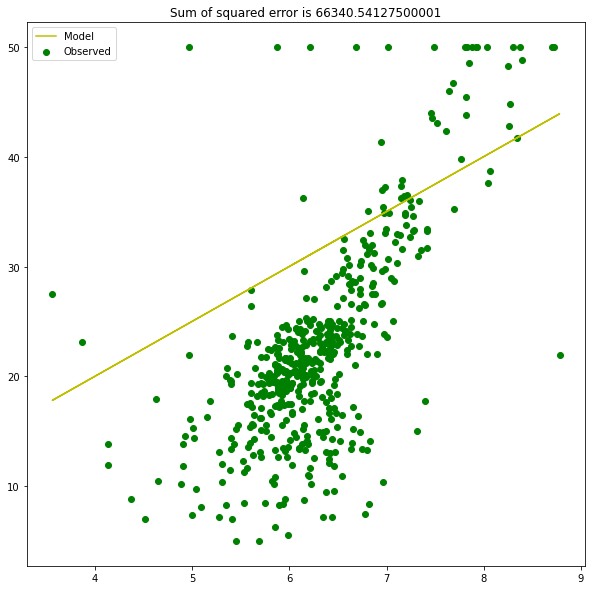

In [5]:
#let's first try to guess the parameters for model between RM and MEDV, for simple linear regression

b0 = 0.01
b1 = 5
housing['Model'] = b0 + b1*housing['RM']
housing['ObservedError'] = housing['MEDV'] - housing['Model']

#plot
plt.figure(figsize=(10,10))
plt.title("Sum of squared error is {}".format((housing['ObservedError']**2).sum()))
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='Observed')
plt.plot(housing['RM'], housing['Model'], color='y', label='Model')
plt.legend()
plt.show()

# Ordinary Least Square Estimation: Estimating Population Parameters

Prediction Equation : $\hat{y_i} = b_0 + b_1x_i$
  * $b_0$: estimated value for $\beta_0$
  * $b_1$: estimated value for $\beta_1$
  * $\epsilon_i$: the error, the shortest distance between the data point $(x_i,y_i)$ and the prediction equation line for given estimated values  
  * minimization problem: need to find $b_0$ and $b_1$ that minimizes sum of squared errors: $ \sum_{i=1}^{N}\epsilon_i^2$
  * solving the minimization problem gives us the prediction equation that is **the best fit line**
  
  ### Explicit formulas for estimated values
  $ b_1 = \frac{\sum_{i=1}^N (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^N (x_i - \bar{x})^2}$
  
  $b_0 = \bar{y} - b_1\bar{x} $
  
# Applying Two-Tail Testing

  * Goal: to find significance of the population parameter we chose

$H_0: \beta_1 = 0$ meaning the parameter has no effect

$H_a: \beta_1 \neq 0$

$ \hat{t} = \frac{b_1 - \beta_1}{S_{b_1}}$

  * this statistic follows t-distribution with degreee of freedom n - 2 (because $\bar{x}$ and $\bar{y}$ constrained to compute $S_{b_1}$)
  


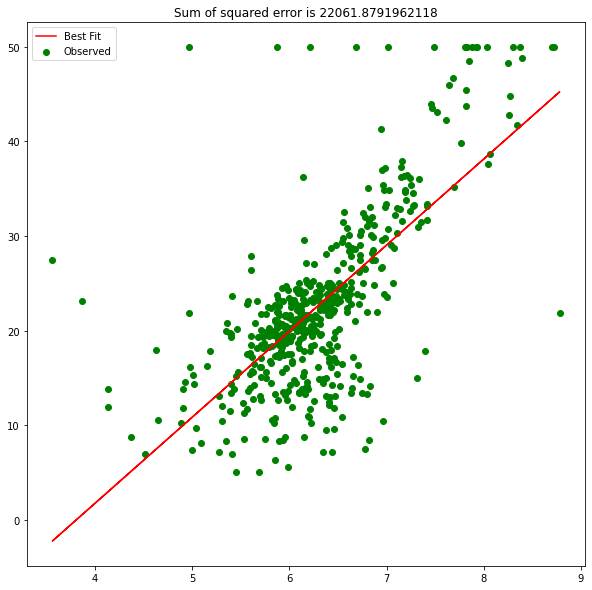

In [10]:
# Now find the best fit line using the statsmodel library
formula = 'MEDV~RM'
model = smf.ols(formula=formula, data=housing,).fit()

b0_ols = model.params[0]
b1_ols = model.params[1]

housing['BestFit'] = b0_ols + b1_ols*housing['RM']
housing['BestFitError'] = housing['MEDV'] - housing['BestFit']

plt.figure(figsize=(10,10))
plt.title("Sum of squared error is {}".format((housing['BestFitError']**2).sum()))
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='Observed')
plt.plot(housing['RM'], housing['BestFit'], color='r', label='Best Fit')
plt.legend()
plt.show()


# Evaluating Model

## R-squared

  * important measure of performance of model

### Step 1: Compute Variation of y without model (Total Variation)

$ SST = \sum_{i=1}^N (y - \bar{y})^2 $

  * y: observed y
  * $\bar{y}$ : mean of y

### Step 2: Compute Variation Explained

$ SSR = \sum_{i=1}^N (\hat{y} - \bar{y})^2 $

  * $\hat{y}$ : computed by the prediction equation, point on the best fit line
  * calculated how much of the variation can be predicted by the model
  
### Step 3: Compute Variation Unexplained

$ SSE = \sum_{i=1}^N (\hat{y} - y)^2 $

  * reflects the variation of response that can't be explained by model
  
### Step 4: Put it all together

Total Variation = Variation Explained + Variation Unexplained

$ R^2 = 1 - \frac{SSE}{SST}$

  * $R^2$ : the percent of variation that can be explained by model
  

In [11]:
#Summary Table

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           2.49e-74
Time:                        16:19:11   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""